In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Atividade 1

Executar o código em Octave ou Scilab, considerando os seguintes sinais:

$x(t) = e^{-at}u(t)$ e $h(t) = sen(at)u(t)$ com $u(t) = \begin{cases} 1 & t \geq 0 \\ 0 &  t < 0 \end{cases}
$

onde a é o número da sua equipe.



Text(0, 0.5, 'h(t)')

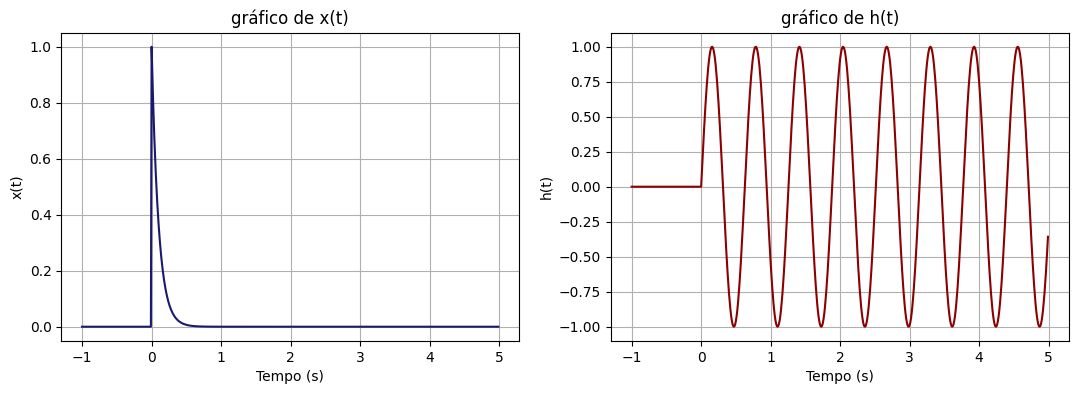

In [2]:
t = np.arange(-1,5,0.01)
a = 10
u = np.heaviside(t,1)
x = np.exp(-a*t) * u
h = np.sin(a*t) * u

fig, axes = plt.subplots(1,2,figsize=(13,4))

for ax in axes:
  ax.grid()
  ax.set_xlabel('Tempo (s)')

axes[0].plot(t,x, 'midnightblue')
axes[0].set_title('gráfico de x(t)')
axes[0].set_ylabel('x(t)')
axes[1].plot(t,h, 'darkred')
axes[1].set_title('gráfico de h(t)')
axes[1].set_ylabel('h(t)')

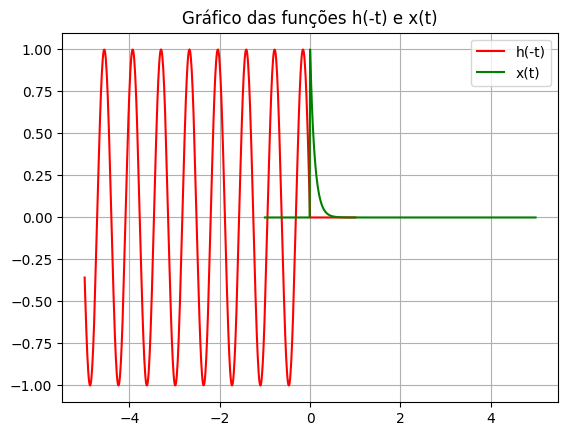

In [3]:
plt.plot(-t,h, 'r', label='h(-t)')
plt.plot(t,x, 'g', label='x(t)')
plt.title('Gráfico das funções h(-t) e x(t)')
plt.legend()
plt.grid()

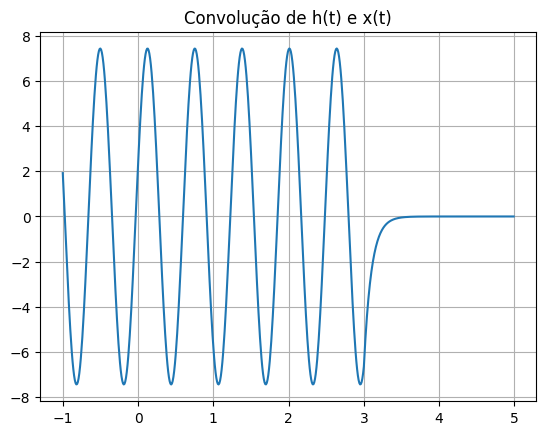

In [4]:
conv = np.convolve(h,x, 'same')
plt.plot(t, conv)
plt.title('Convolução de h(t) e x(t)')
plt.grid()

## Atividade 2

Verificar as propriedades da comutatividade e da distributividade da convolução em tempo contínuo.


Propriedade da comutatividade: $x(t) * h(t) = h(t)*x(t)$

Propriedade da distributividade: $x(t)*(h(t) + g(t)) = x(t)*h(t) + x(t)*g(t)$

Considerar os sinais de tempo contínuo:

$x(t) = p(t), h(t) = [u(t) − u(t −5)] \ e \ g(t) = r(t)$

onde:

$u(t)$ (degrau unitário)

$p(t)$ (pulso retangular unitário)

$r(t)$ (rampa unitária)

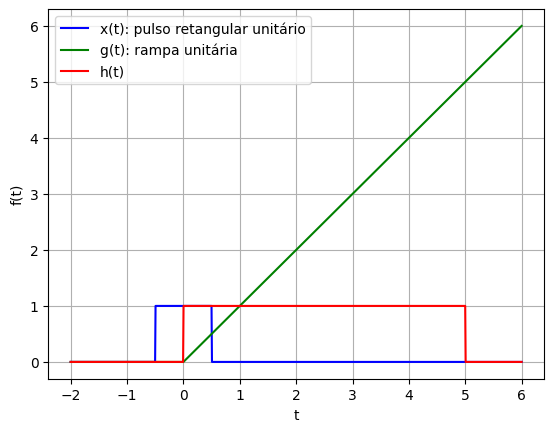

In [5]:
t = np.linspace(-2,6,1000)
a, b = -.5, .5
x = np.where((t >= a) & (t <= b), 1, 0)
g = np.maximum(t,0)
h = np.heaviside(t, 1) - np.heaviside(t-5, 1)
plt.plot(t,x, c='b', label='x(t): pulso retangular unitário')
plt.plot(t,g, c='g', label='g(t): rampa unitária')
plt.plot(t,h, c='r', label='h(t)')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.legend()
plt.grid()

Igual = True


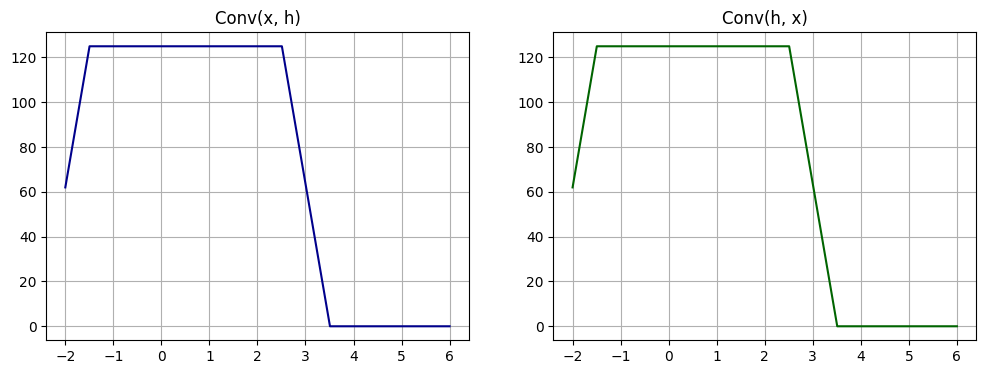

In [6]:
conv_xh = np.convolve(x,h, 'same')
conv_hx = np.convolve(h,x, 'same')

fig, axes = plt.subplots(1,2,figsize=(12,4))

for ax in axes: ax.grid()

axes[0].plot(t, conv_xh, 'darkblue')
axes[0].set_title('Conv(x, h)')
axes[1].plot(t, conv_hx, 'darkgreen')
axes[1].set_title('Conv(h, x)')

igual = np.allclose(conv_xh, conv_hx, atol=1e-10)
print(f'Igual = {igual}')

Igual = True


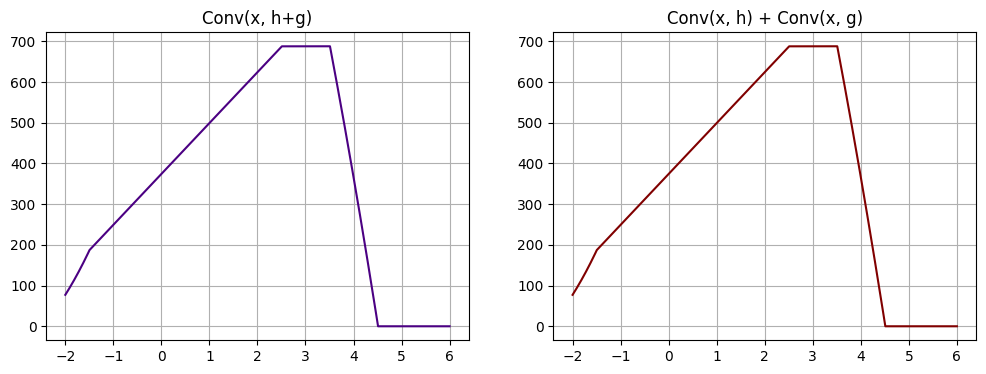

In [7]:
conv1 = np.convolve(x,h+g, 'same')
conv2 = np.convolve(x,h, 'same') + np.convolve(x,g, 'same')

fig, axes = plt.subplots(1,2,figsize=(12,4))

for ax in axes: ax.grid()

axes[0].plot(t, conv1, 'indigo')
axes[0].set_title('Conv(x, h+g)')
axes[1].plot(t, conv2, 'maroon')
axes[1].set_title('Conv(x, h) + Conv(x, g)')

igual = np.allclose(conv1, conv2, atol=1e-10)
print(f'Igual = {igual}')

## Exemplos de funções combinadas com u(t)

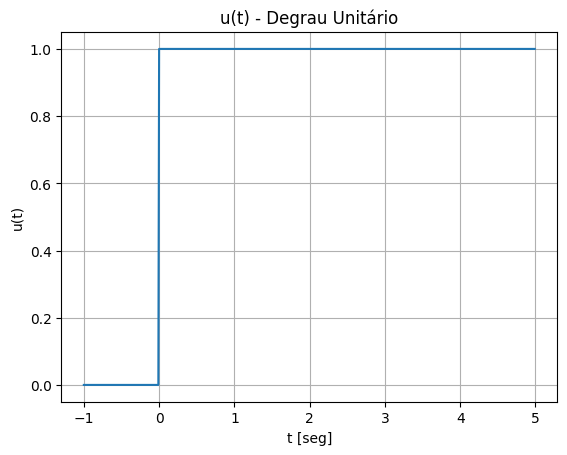

In [8]:
t = np.arange(-1,5,0.01)
u = np.heaviside(t,1)
plt.plot(t,u)
plt.title("u(t) - Degrau Unitário")
plt.xlabel('t [seg]')
plt.ylabel('u(t)')
plt.grid()

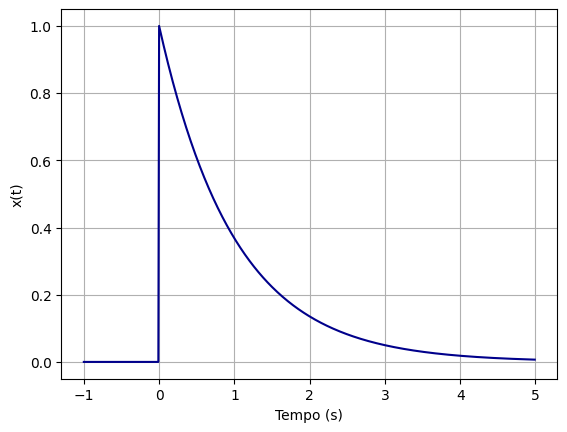

In [9]:
x = np.exp(-t) * u
plt.plot(t,x, 'darkblue')
plt.xlabel('Tempo (s)')
plt.ylabel('x(t)')
plt.grid()

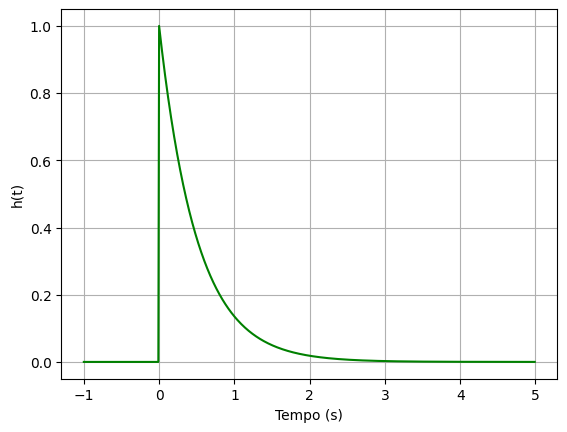

In [10]:
h = np.exp(-2*t) * u
plt.plot(t,h, 'g')
plt.xlabel('Tempo (s)')
plt.ylabel('h(t)')
plt.grid()

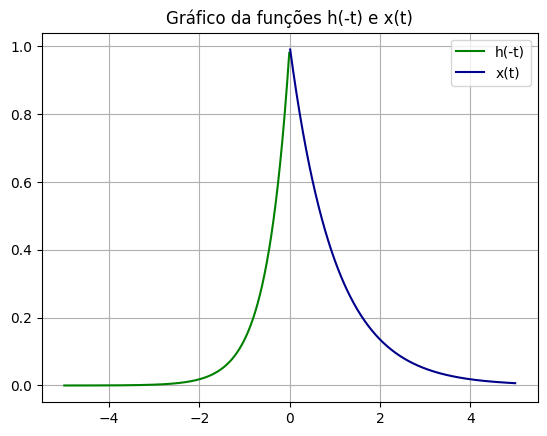

In [11]:
t = np.arange(0.01,5,0.01)
x = np.exp(-t)
h = np.exp(-2*t)
plt.plot(-t,h, 'g', label='h(-t)')
plt.plot(t,x, 'darkblue', label='x(t)')
plt.title('Gráfico da funções h(-t) e x(t)')
plt.legend()
plt.grid()

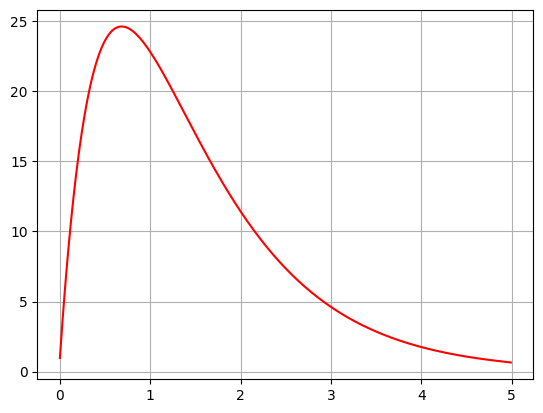

In [12]:
t = np.arange(0,5,0.01)
y = np.convolve(h,x)
plt.plot(t,y[0:len(t)], 'r')
plt.grid()